In [1]:
library(Seurat)
library(SeuratObject)
library(dplyr)
library(ggplot2)


file_name <- paste0("IntegrateWithPollen_InN_seurat")
seu <- readRDS(file = paste0("./load_files/", file_name, ".slim.rds"))

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'SeuratObject':
  method                     from  
  $.JackStrawData            Seurat
  $.Seurat                   Seurat
  $.SeuratCommand            Seurat
  $<-.Seurat                 Seurat
  [.Assay                    Seurat
  [.DimReduc                 Seurat
  [.Seurat                   Seurat
  [.SeuratCommand            Seurat
  [[.Assay                   Seurat
  [[.DimReduc                Seurat
  [[.Seurat                  Seurat
  levels<-.Seurat            Seurat
  .DollarNames.JackStrawData Seurat
  .DollarNames.Seurat        Seurat
  .DollarNames.SeuratCommand Seurat
  as.list.SeuratCommand      Seurat
  as.logical.JackStrawData   Seurat
  dim.Assay                  Seurat
  dim.DimReduc               Seurat
  dim.Seurat                 Seurat
  dimnames.Assay             Seurat
  dimnames.DimReduc          Seurat
  dimnames.

In [2]:
## Update cluster labels
seu$subtype2 <- ifelse(is.na(seu$subtype), "unknown", seu$subtype)
seu$mres2 <- ifelse(is.na(seu$cluster), "unknown", seu$cluster)
seu$mres2[seu$mres2 %in% c("S-phase_MCM4/H43C", "G1-phase_SLC1A3/ATP1A1", "G2-M_UBE2C/ASPM")] <- "cyclying"
seu$mres2[seu$mres2 %in% c("MGE_CRABP1/TAC3", "MGE_CRABP1/MAF")] <- "MGE_CRABP1"
seu$mres2[seu$mres2 %in% c("RMTW_ZIC1/RELN", "VMF_ZIC1/ZIC2")] <- "VMF_ZIC1"

In [3]:
## Set color schmes
tb <- read.table("./load_files/inn.merge.ident.txt", sep="\t", stringsAsFactors=FALSE, header=TRUE, comment.char = "")
cls_cols <- setNames(tb$color, tb$cluster)

mres_cols <- c("#68b6f2", "#80cdc1", 
    "#b106cc", "#d211f0", "#8711d1",
    "#d6604d", "#80cdc1", "#b01e34", "#c48bb3", "#e0e0e0", "#fee090", "#fee090") %>%
        setNames(., c("CGE_NR2F2/PROX1", "LGE_MEIS2/PAX6", 
            "LGE_FOXP1/PENK", "LGE_FOXP2/TSHZ1", "LGE_FOXP1/ISL1", 
            "MGE_CRABP1", "VMF_ZIC1", "MGE_LHX6/NPY", "MGE_LHX6/MAF", "unknown", "cyclying", "Transition"))

dataset_cols <- c("#6cf58c", "#434544") %>% setNames(., c("This study", "Schmitz et al., 2022"))
col_list <- list(subtype2 = cls_cols, 
            mres2 = mres_cols,
            dataset = dataset_cols)

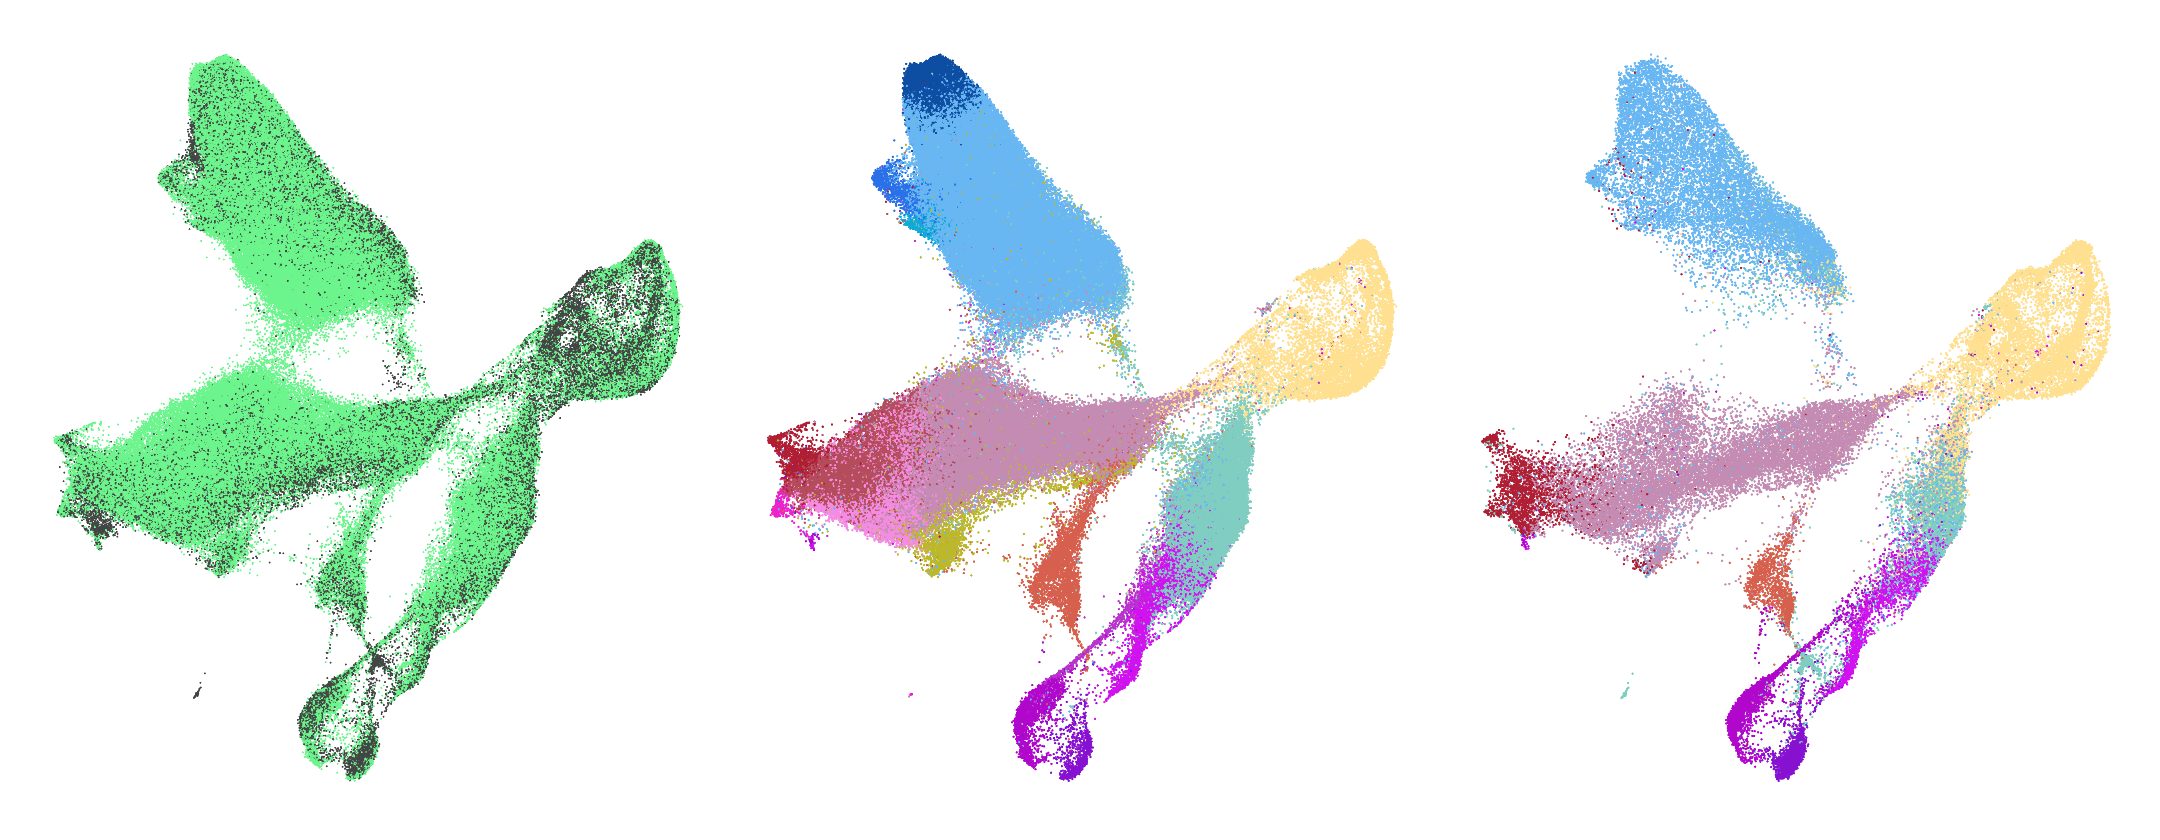

In [4]:
## Visualization
pdata <- cbind(seu@meta.data[, c("mres2", "subtype2", "age")], seu$umap@cell.embeddings) %>%
            mutate(dataset = ifelse(age %in% c("E93", "E110"), "This study", "Schmitz et al., 2022"))

## Shuffle the dots
set.seed(42)
pdata <- pdata[sample(1:nrow(pdata)), ]


plist <- lapply(c("dataset", "subtype2", "mres2"), function(tp) {
    if (tp %in% c("subtype2", "mres2")){
        subdata <- pdata[pdata[, tp] != "unknown", ]
    } else {
        subdata <- pdata
    }
    tp_size <- ifelse(tp %in% c("subtype2", "mres2"), 0.2, 0.1)
    p <- ggplot(subdata, aes_string(x = "UMAP_1", y = "UMAP_2", color = tp)) +
                ggrastr::rasterise(geom_point(size = tp_size, shape = 16), dpi = 300, scale = 1) +
                theme_classic() + 
                scale_color_manual(values = col_list[[tp]]) + 
                theme(legend.position = "none",
                        line = element_blank(),axis.title.x = element_blank(),axis.title.y = element_blank(),
                        axis.text.x=element_blank(),axis.text.y=element_blank(), 
                        plot.title = element_blank())
    return(p)
    })
pcbn <- patchwork::wrap_plots(plotlist = plist, nrow = 1, ncol = 3)
options(repr.plot.width=18, repr.plot.height=7)
pcbn

In [5]:
pdf(paste0("./report/", "Inte_Pollen_InN_idents_v3.pdf"), width = 24, height = 8)
print(pcbn)
dev.off()

png 
  2

                  node
1           This study
2 Schmitz et al., 2022
                  node
1     inIPC ASCL1 DLX1
2    inIPC ASCL1 SFRP2
3     inIPC ASCL1 GSX1
4  inIPC ASCL1 GADD45G
5     inIPC ASCL1 GPX1
6      inIPC ASCL1 SP8
7   inIPC ASCL1 NKX2-1
8     inIPC DLX1 NR2F2
9     InN NKX2-1 CCND2
10       InN LHX8 ZIC1
11        InN LHX6 CCK
12     InN LHX6 CRABP1
13        InN LHX6 MAF
14   InN LHX6 SST RELN
15    InN LHX6 SST NPY
16        InN LHX6 DCN
17    InN LHX6 GUCY1A2
18            InN HMX1
19       InN NR2F2 CRH
20     InN NR2F2 LAMP5
21       InN NR2F2 VIP
22   InN NR2F2 SP8 KIT
23       InN NR2F2 SP8
24         InN SP8 CRH
25         InN SP8 VIP
26  InN SP8 MEIS2 RND3
27        InN SP8 PAX6
28       InN ZIC1 ZIC2
29           InN GNRH1
30     InN SFRP2 MEIS2
31      InN SIX3 ZFHX3
32      InN FOXP1 ISL1
33      InN FOXP1 PENK
34     InN FOXP2 TSHZ1
              node
1  CGE_NR2F2/PROX1
2   LGE_MEIS2/PAX6
3   LGE_FOXP1/PENK
4  LGE_FOXP2/TSHZ1
5   LGE_FOXP1/ISL1
6       MGE_

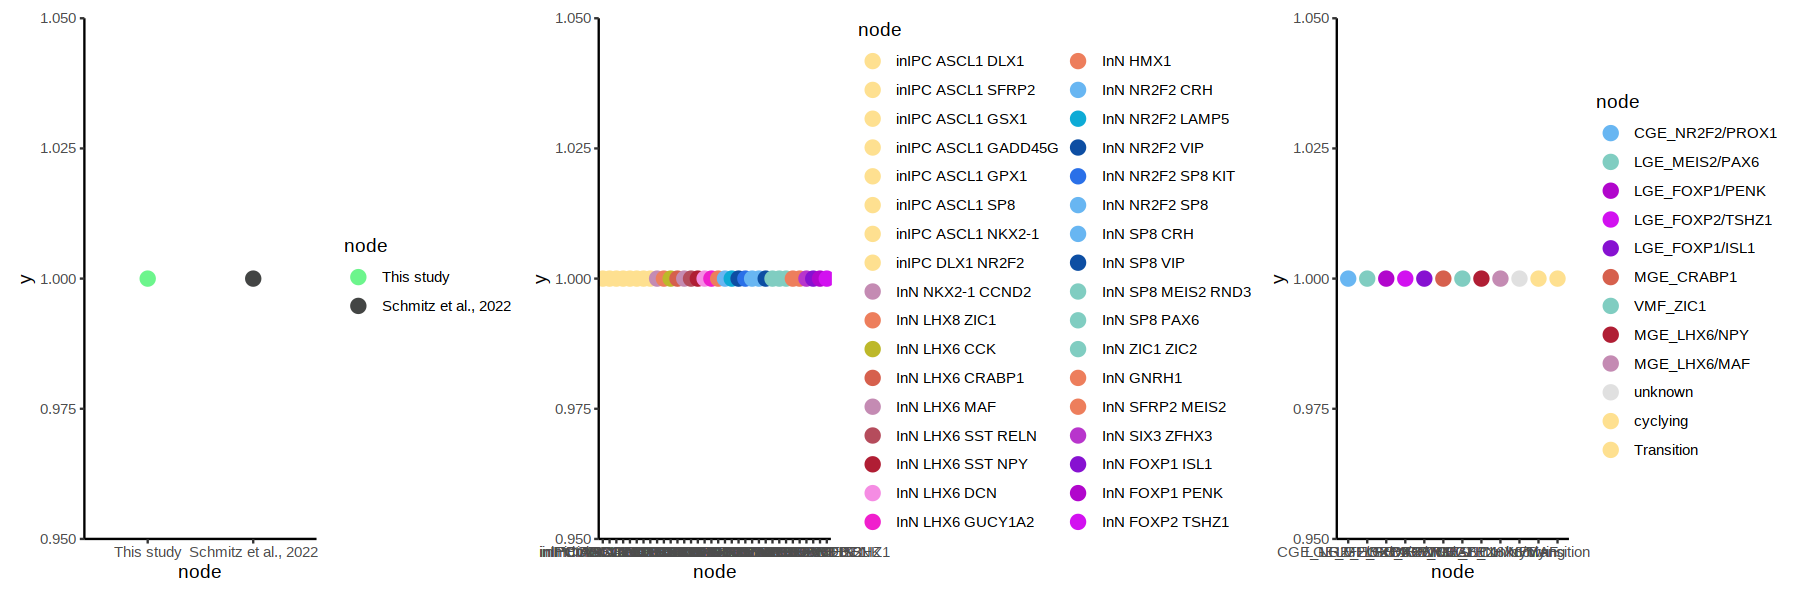

In [6]:
## Figure legends
lg_list <- lapply(c("dataset", "subtype2", "mres2"), function(tp) {
    df <- data.frame(node = factor(names(col_list[[tp]]), levels = names(col_list[[tp]])))
    print(df)
    p <- ggplot(df, aes(x = node, y = 1, color = node)) +
            geom_point(size = 4, shape = 16)+
            scale_color_manual(values = col_list[[tp]]) +
            theme_classic()
    p
    })
lgplot <- patchwork::wrap_plots(plotlist = lg_list, nrow = 1, ncol = 3)
options(repr.plot.width=15, repr.plot.height=5)
lgplot

In [7]:
pdf(paste0("./report/", "Inte_Pollen_InN_idents_legend.pdf"), width = 15, height = 5)
print(lgplot)
dev.off()

png 
  2

In [8]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRblas.so
LAPACK: /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.3.0      dplyr_1.0.7        SeuratObject_4.0.0 Seurat_3.1.5      

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [